In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import permutations
from collections import defaultdict
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
def slime(start_pop = 100,
          fig_size = [5,5],
          border = 40,
          sight = 5,
          board_size = 100,
          max_hp = 6,
          baby_hp = 3,
          log = False,
          frames=20,
          interval=50,
          mode='once'):
    
    def sig_func(x,y):
        return(1/(1+np.exp(-(np.dot(x,y)))))

    # Funtion to build the initial cell list.  NN is built around sight/input of 5, movement/output of 3.
    def cell_list():
        start_coords = np.random.choice(range(border,board_size-border),start_pop*2)
        cells  = defaultdict(dict)
        for i in range(0,board_size,2):
            name = str(random.getrandbits(128))
            cells[name] = {}
            coords = [start_coords[i],start_coords[i+1]]
            disc_weights = 2*np.random.random((sight*sight,3*3))-1
            cells[name]['size'] = baby_hp
            cells[name]['coords'] = coords
            cells[name]['disc_weights'] = disc_weights
        return(cells)
    
    # Create the cell list.
    cells = cell_list()

    # Create the board.
    X = np.zeros(shape=(board_size,board_size))
    
    # initialization function: plot the background of each frame
    def init():
        im.set_data(X)
        return (im,)
    
    # Get the coodinates for the input.
    L = [0, 0, 1, 1, -1, -1, 2, 2, -2, -2]
    keep = [0,0]
    for comb in permutations(L, r=2):
        keep = np.vstack((keep, comb))
    
    # Setup plotting.
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap='hot', interpolation='nearest')
    im.set_clim(0, 8)

    def animate(i):
        # Take turns through the cell list.
        im.set_data(animate.X)
        for i in list(cells):
            # Input.
            test_in = []
            for perm in np.mod(cells[i]['coords'] + np.unique(keep,axis=0), board_size):
                test_in = np.append(test_in,X[perm[0],perm[1]])
            # Output.
            test_out = sig_func(test_in,cells[i]['disc_weights'])
            d = test_out.argmin()
            
            # Stay and Grow.
            if(d==4):               
                if(cells[i]['size'] < max_hp):
                    cells[i]['size'] += 1
                    if(log == True):
                        print("{0} grew to size {1}.".format(i, cells[i]['size']))
            # Move.
            else:
                if(d==0):
                    new_coord = [-1,1]
                if(d==1):
                    new_coord = [0,1]
                if(d==2):
                    new_coord = [1,1]
                if(d==3):
                    new_coord = [-1,0]
                if(d==5):
                    new_coord = [1,0]
                if(d==6):
                    new_coord = [-1,-1]
                if(d==7):
                    new_coord = [0,-1]
                if(d==8):
                    new_coord = [1,-1]
                    
                # Split.
                if(cells[i]['size'] >= max_hp):
                    # Half its size.
                    cells[i]['size'] = baby_hp
                    # Give the baby attributes and mutate the NN.
                    baby_name = str(random.getrandbits(128))
                    cells[baby_name]['size'] = cells[i]['size']
                    cells[baby_name]['coords'] = cells[i]['coords']
                    cells[baby_name]['disc_weights'] = cells[i]['disc_weights']
                    cells[baby_name]['disc_weights'][np.random.choice(sight*sight),
                                                     np.random.choice(3*3)] == 2*np.random.random(1)-1
                    if(log == True):
                        print("{0} underwent mitosis.  Gave birth to {1}.".format(i, baby_name))

                # If it moved.
                if(X[np.mod(np.add(cells[i]['coords'], new_coord), board_size)[0],
                     np.mod(np.add(cells[i]['coords'], new_coord), board_size)[1]] == 0):
                    # Clear where it was.
                    X[cells[i]['coords'][0],cells[i]['coords'][1]] = 0
                    # Give new coordinate and fill it in.
                    cells[i]['coords'] = np.mod(np.add(cells[i]['coords'], new_coord), board_size)
                    X[cells[i]['coords'][0],cells[i]['coords'][1]] = abs(sum(sum(cells[i]['disc_weights'])))

                else:
                    # It gets bumped.
                    cells[i]['size'] -= 1
                    if(log == True):
                        print("{0} was injured to size {1}!".format(i, cells[i]['size']))
                    # Handle death.
                    if(cells[i]['size'] < 1):
                        try:
                            # Clear where it was and delete from list.
                            X[cells[i]['coords'][0],cells[i]['coords'][1]] = 0
                            del cells[i]
                            if(log == True):
                                print("{0} died!.".format(i))
                        except KeyError:
                            pass
                        
        return (im,)
        
    animate.X = X
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=interval)
    #print(cells.keys())
    #print(cells.values())
    
    return (display_animation(anim, default_mode=mode),cells)

In [3]:
gr, c = slime()


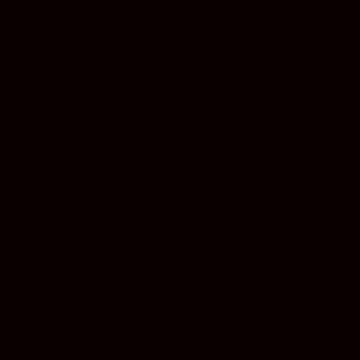
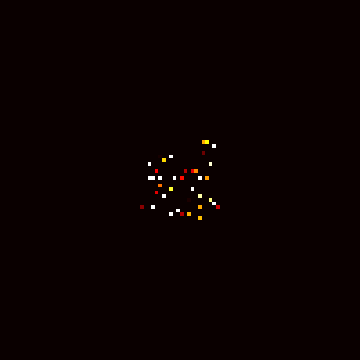
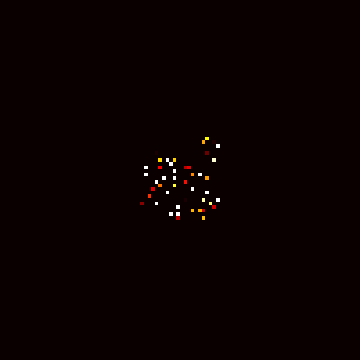
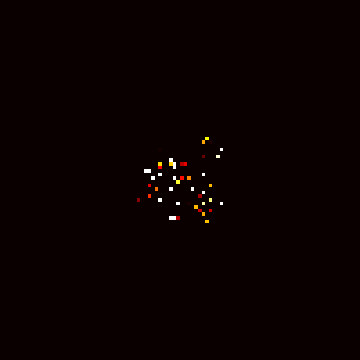
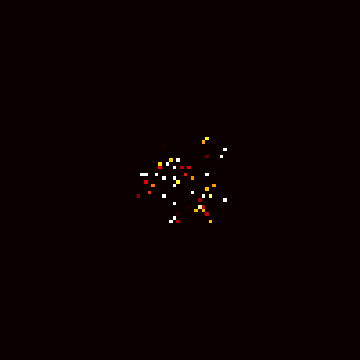
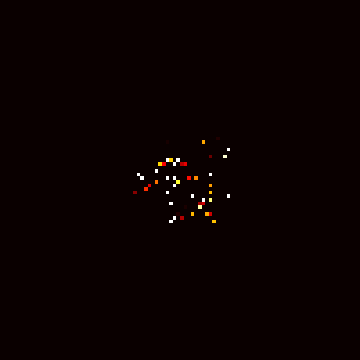
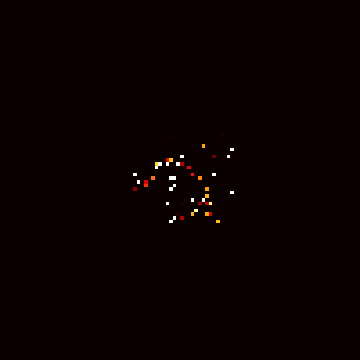
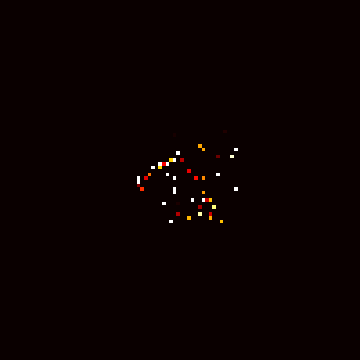
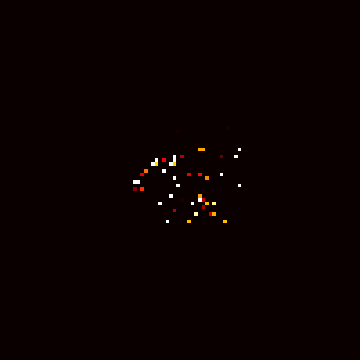
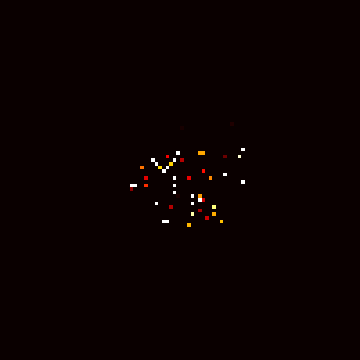
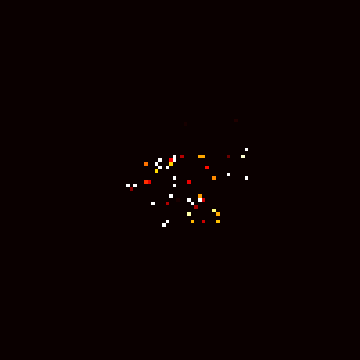
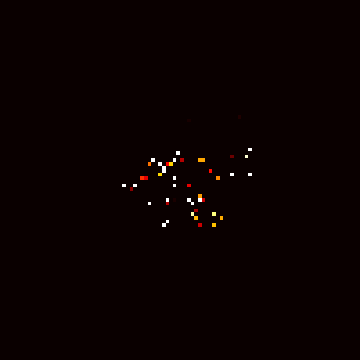
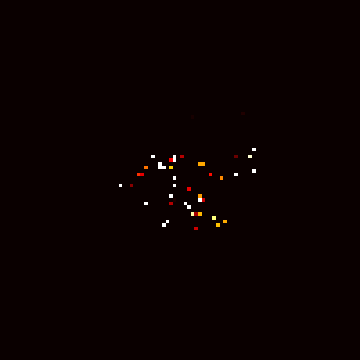
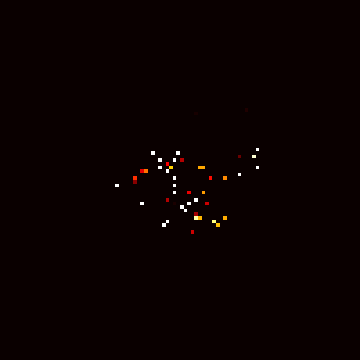
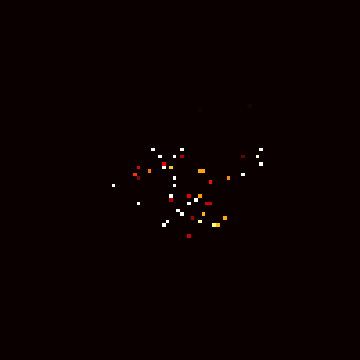
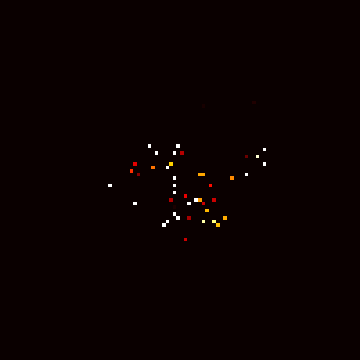
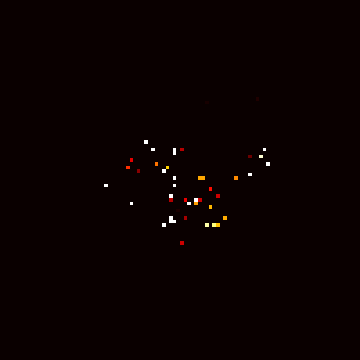
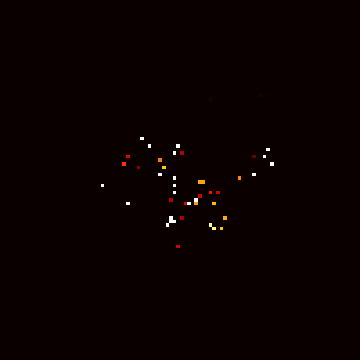
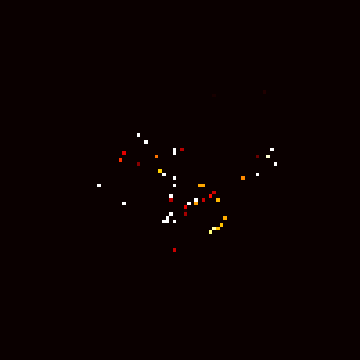
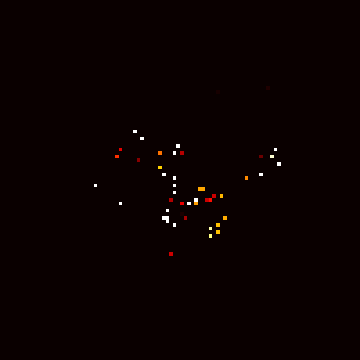

In [4]:
gr

In [5]:
c

defaultdict(dict,
            {'90317715904761340860708171391467188503': {'size': 6,
              'coords': array([51, 48]),
              'disc_weights': array([[-0.72387771,  0.18394574,  0.95120488,  0.53266792, -0.55785592,
                      -0.18872979, -0.16805124,  0.23620555, -0.18662255],
                     [-0.45250472,  0.17053308,  0.55075626, -0.86996018,  0.43357787,
                      -0.31048568,  0.86527664,  0.58879515, -0.35881713],
                     [ 0.72325937,  0.59521925, -0.01594224,  0.73392203,  0.61946538,
                       0.18641143, -0.289223  , -0.46912075,  0.14551465],
                     [-0.73194327,  0.68857193,  0.09745547, -0.79750776,  0.51265505,
                      -0.8005072 ,  0.13586016, -0.01063118, -0.61776515],
                     [-0.46658826, -0.40669924, -0.0701084 ,  0.61263333, -0.26498582,
                       0.1632764 , -0.50882853,  0.78709573, -0.19023405],
                     [ 0.24804802,  0.48502874, 

In [6]:
stack = np.zeros((len(c),225))
for i in range(0,len(c)):
    stack[i,] = list(c.values())[i]['disc_weights'].flatten()

In [7]:
stack

array([[-0.72387771,  0.18394574,  0.95120488, ...,  0.88836907,
        -0.74704969, -0.1426811 ],
       [ 0.65273053, -0.41746045,  0.0423254 , ..., -0.69394328,
         0.35857893,  0.77613672],
       [ 0.2981319 ,  0.96709864, -0.238463  , ..., -0.46095661,
        -0.98290948,  0.87898331],
       ..., 
       [ 0.40699634,  0.02460489,  0.15599246, ..., -0.21907984,
         0.27595219, -0.18234264],
       [ 0.40699634,  0.02460489,  0.15599246, ..., -0.21907984,
         0.27595219, -0.18234264],
       [ 0.73184218, -0.3832413 , -0.29184406, ...,  0.80431534,
         0.80710546,  0.13699478]])

In [8]:
db = DBSCAN().fit(stack)

NameError: name 'DBSCAN' is not defined